In [10]:
import numpy as np
import pandas as pd
from matplotlib.dates import date2num, num2date
import datetime as datetime
import matplotlib .pyplot as plt
from mpl_toolkits import mplot3d
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [20]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,time,latitude,longitude
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,2519.500000,2519.500000,737032.853472,-10.927633,-37.049905
std,1455.067009,1455.067009,2.020926,0.015460,0.002950
min,0.000000,0.000000,737029.354167,-10.976737,-37.056865
25%,1259.750000,1259.750000,737031.103819,-10.930650,-37.051766
50%,2519.500000,2519.500000,737032.853472,-10.922648,-37.051189
75%,3779.250000,3779.250000,737034.603125,-10.921944,-37.047698
max,5039.000000,5039.000000,737036.352778,-10.900390,-37.041664


1. Find the earliest date and the most recent date for the dataset.

In [2]:

df = pd.read_csv('2046729_traj.csv')

print(np.max(df['time'].values))
print(np.min(df['time'].values))
timediff = df['time'].values[1] - df['time'].values[0]
print(timediff)


high= (np.max(df["time"].values))
low= (np.min(df["time"].values))

print(num2date(high))
print(num2date(low))

737036.3527777778
737029.3541666665
0.0013888891553506255
2018-12-08 08:28:00+00:00
2018-12-01 08:29:59.999980+00:00


2. Find the time interval for the dataset. Is it constant?

[0.00138889 0.00138889 0.00138889 ... 0.00138889 0.00138889 0.00138889]


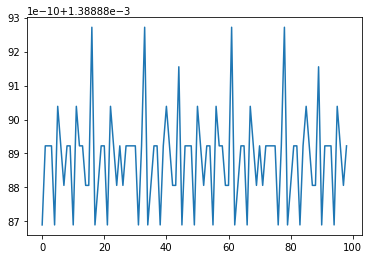

In [6]:
differences = np.diff( df["time"].values)
diff= np.array(differences)
print(diff)
plt.plot(diff[1:100])

3. Plot the latitude vs longitude.

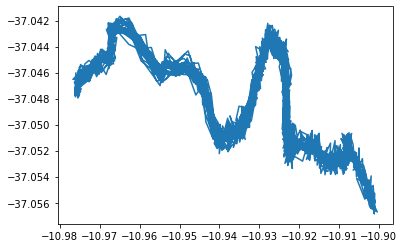

In [7]:
fig, ax= plt.subplots()
ax.plot(df["latitude"], df["longitude"])
plt.show()

4.  Create a 3D plot of the latitude vs longitude vs time.

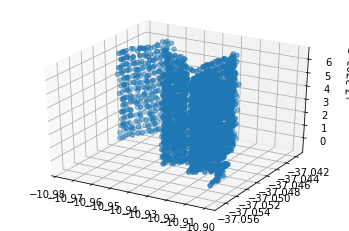

In [8]:

figuredf = plt.figure()
axdf= plt.axes(projection = "3d")
digitalplot = axdf.scatter3D(df["latitude"], df["longitude"],df["time"])

5. Compute the temporal auto correlation. Display the autocorelation in a plot.

0.948954262063433


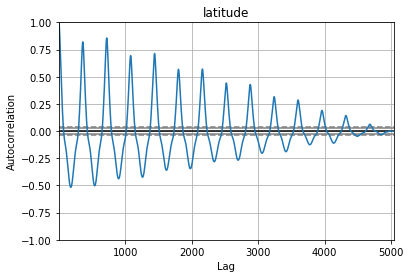

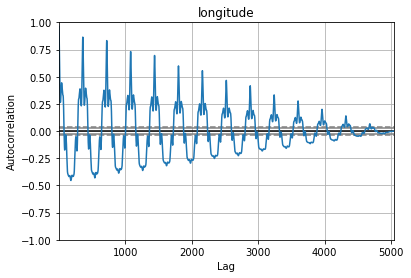

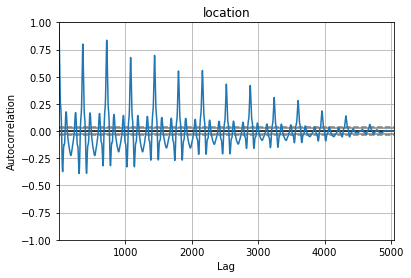

In [24]:
#combine geo locations
location= df["latitude"]*df["latitude"] +df["longitude"]*df["longitude"]

# compute auto correlations
auto_lat= acf(df["latitude"])
auto_lat_1= df["latitude"].autocorr(lag=2)

auto_long= acf(df["longitude"])
auto_long_1= df["longitude"].autocorr(lag=2)

auto_corr= acf(location)
auto_corr_1= location.autocorr(lag=2)

print(auto_corr_1)

# plot auto correlations 
autocorrelation_plot(df["latitude"])
plt.title("latitude")
plt.show()

autocorrelation_plot(df["longitude"])
plt.title("longitude")
plt.show()

autocorrelation_plot(location)
plt.title("location")
plt.show()

6. Evaluate the periodicity of the dataset with a periodogram.

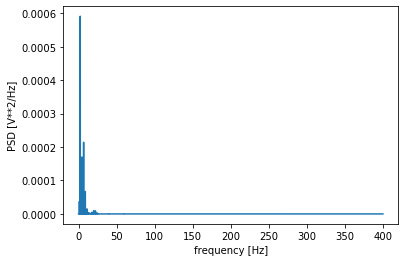

In [41]:

from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal


location= series["latitude"]+series["longitude"]


fs = 800

plt.figure()
f, Pxx_den = signal.periodogram(location, fs)
#plt.semilogy(f, Pxx_den)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


0       28.449091
1       28.450027
2       28.450067
3       28.450697
4       28.448914
          ...    
5035    28.450595
5036    28.449367
5037    28.449398
5038    28.448635
5039    28.449232
Length: 5040, dtype: float64
0          NaN
1          NaN
2    28.449728
3    28.450264
4    28.449893
5    28.450057
6    28.449423
7    28.449736
8    28.449266
9    28.449296
dtype: float64


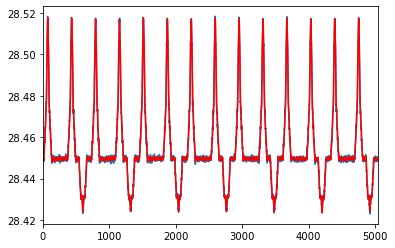

In [36]:

dist = np.sqrt(df["longitude"] *df["latitude"]  + df["longitude"] *df["latitude"] )
print(dist)


from pandas import read_csv
from matplotlib import pyplot

#series = read_csv('2046729_traj.csv', header=0, index_col=0)
# Tail-rolling average transform
rolling = dist.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
dist.plot()
rolling_mean.plot(color='red')
pyplot.show()

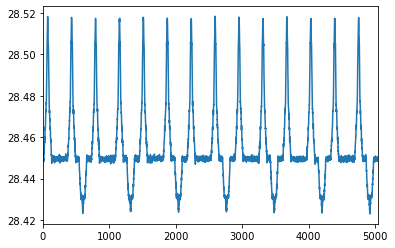

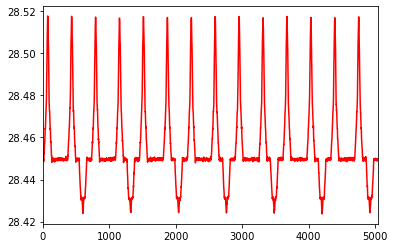

In [40]:
# plot original and transformed dataset
dist.plot()
pyplot.show()
rolling_mean.plot(color='red')
pyplot.show()

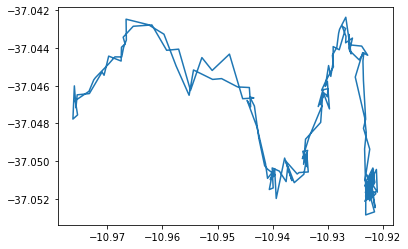

In [43]:
plt.plot(df["latitude"][:181], df["longitude"][:181])

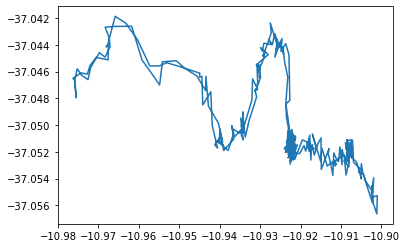

In [45]:
plt.plot(df["latitude"][181:721], df["longitude"][181:721])

In [46]:
df_1 = pd.read_csv('2046729_spatial.csv')